<a href="https://colab.research.google.com/github/Dwan72/Java_Programming/blob/master/ML_Assignment3_DAn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install ucimlrepo


In [42]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


#grabbing features and targets, and normalizing them with scaler
dry_bean = fetch_ucirepo(id=602)
X = dry_bean.data.features
y = dry_bean.data.targets
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#print(pd.DataFrame(X_scaled, columns=X.columns).head())
num_categories = y.nunique()
clusters = y['Class'].nunique()
print(clusters)
clusters += 3 #I'm adding three to see the pattern after i hit 7 clusters. 7 clusters is to match the number of unique label values

7


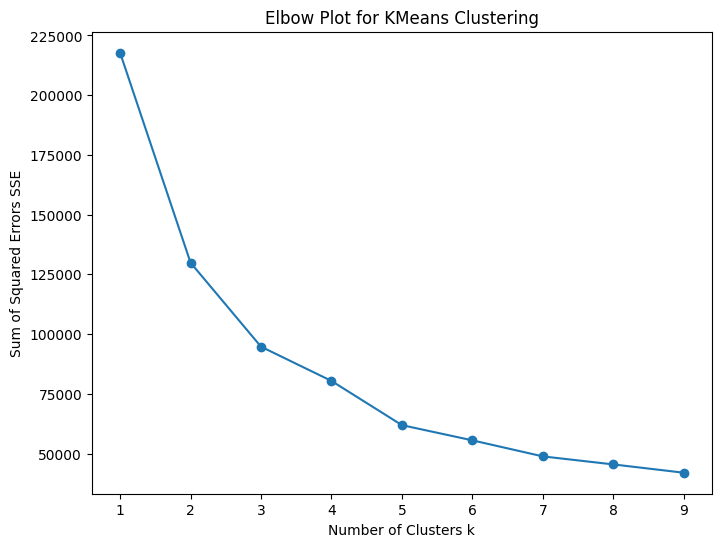

In [40]:
sse = {}

for k in range(1, clusters):
    kmeans = KMeans(n_clusters=k, n_init="auto", random_state=42)
    kmeans.fit(X_scaled)
    sse[k] = kmeans.inertia_


plt.figure(figsize=(8, 6))
plt.plot(sse.keys(), sse.values(), marker='o')
plt.xlabel('Number of Clusters k')
plt.ylabel('Sum of Squared Errors SSE')
plt.title('Elbow Plot for KMeans Clustering')
plt.show()

I plotted with a line because it is easier to visualize the trend. The one thing of note on this graph is the SSE drops a little more from 6 -> 7 than it does from the trend of the elbow. This might be because there are 7 unique values for the targets column, and so clustering for each unique value might have optimal results for splitting the data. The below will now plot the data in a table.



<Figure size 500x600 with 0 Axes>

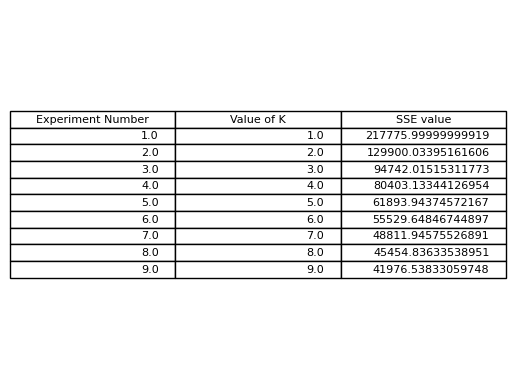

In [41]:
plt.figure(figsize=(5, 6))
data = {
    'Experiment Number': sse.keys(),
    'Value of K': sse.keys(),
    'SSE value': sse.values()
}

e_df = pd.DataFrame(data)
fig, ax = plt.subplots()
table = ax.table(cellText=e_df.values, colLabels=e_df.columns, loc='center')
ax.axis('off')

plt.show()

#Adding data table because it was requested by the assignment